# SQL modification statements

## Preparation

For this section you need `chinook.db` database file and working `%sql` magic.  
If you don't have it, please go back to the [previous section](../09_sql/connect_to_database.ipynb) and follow the instructions.  
The following code should not produce any errors:

In [ ]:
%load_ext sql
%sql sqlite:///chinook.db

## UPDATE - change existing rows

### Overview

To update existing data in a table, you use the `UPDATE` statement.

```sql
UPDATE table
   SET column_1 = new_value_1,
       column_2 = new_value_2
   WHERE
       search_condition 
   ORDER column_or_expression
   LIMIT row_count OFFSET offset
```

You need/may specify:
- Name of the `table` where you want to make changes.
- Names of the columns and their new value(s) in the `SET` clause.
- Which rows to update using a condition in the `WHERE` clause. The `WHERE` clause is optional. If you skip it, the `UPDATE` statement will update data in all rows of the table.
- Finally, use the `ORDER BY` and `LIMIT` clauses in the `UPDATE` statement to specify the number of rows to update.

*Notes:*
- If you use a negative value in the `LIMIT` clause, SQL updates all rows that meet the condition in the preceding `WHERE ` clause.
- The `ORDER BY` clause should always goes with the `LIMIT` clause to specify exactly which rows to be updated. Otherwise, you will never know which row will be actually updated; because without the `ORDER BY` clause, the order of rows in the table is unspecified.

### Example

We use the `employees` table in the sample database to demonstrate the `UPDATE` statement.

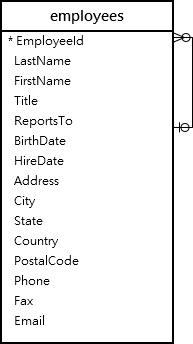

The following `SELECT` statement gets partial data from the `employees` table:

In [ ]:
%%sql
SELECT EmployeeId, FirstName, LastName, Title, Email
  FROM employees
  ORDER BY EmployeeId LIMIT 5

Let's suppose that *Jane* changed her last name to *Smith*. You can perform such update as follows:

In [ ]:
%%sql
UPDATE employees
  SET LastName = 'Smith'
  WHERE EmployeeId = 3

To verify the `UPDATE` let's show the same few rows again:

In [ ]:
%%sql
SELECT EmployeeId, FirstName, LastName, Title, Email
  FROM employees
  ORDER BY EmployeeId LIMIT 5

## INSERT - add new rows

### Overview

To insert data into a table, you use the `INSERT` statement:

```sql
INSERT INTO table (column_1, column_2, column_3)
  VALUES (new_value_1, new_value_2, new_value_3) 
```

The columns of a table which are not listed will get their default values.

### Example (insert a provided value)

We will use the `artists` table in the sample database for the demonstration.

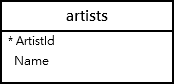

Let's first check the number of records in the `artists` table:

In [ ]:
%sql SELECT COUNT(*) FROM artists

The following statement inserts a new row into the `artists` table:

In [ ]:
%%sql
INSERT INTO artists (Name)
   VALUES('Bud Powell')

Let's check the count of rows after the insert:

In [ ]:
%sql SELECT COUNT(*) FROM artists

Because the `ArtistId` column is an auto-increment column, you can ignore it in the statement. SQL will automatically geneate a sequential integer number to insert into the `ArtistId` column.

You can verify the insert operation by using the following `SELECT` statement:

In [ ]:
%%sql
SELECT *
  FROM artists
  ORDER BY ArtistId DESC LIMIT 5

### Example (insert default values)

`INSERT DEFAULT VALUES` adds a new row into a table using the default values specified in the column definition or `NULL` if the default value is not available and the column does not have a `NOT NULL` constraint. For autoincrement columns, the default value is the next integer.

For example, the following statement inserts a new row into the `artists` table using `INSERT DEFAULT VALUES`:

In [ ]:
%%sql
INSERT INTO artists 
  DEFAULT VALUES 

Let's verify the recent insert:

In [ ]:
%%sql
SELECT *
  FROM artists
  ORDER BY ArtistId DESC LIMIT 5

### Example (insert many rows from another `SELECT` statement)

Suppose you want to backup the `artists` table. You can follow these steps:
- Create a new table named `artists_backup`.
- Insert data from `artists` into the `artists_backup`.
- (To clean up) Drop the new table.

Let's create the new table:

In [ ]:
%%sql
CREATE TABLE artists_backup(
   ArtistId INTEGER PRIMARY KEY AUTOINCREMENT,
   Name NVARCHAR
)

There should be no content in the new table:

In [ ]:
%sql SELECT * FROM artists_backup LIMIT 5

Let's insert new data:

In [ ]:
%%sql
INSERT INTO artists_backup 
  SELECT ArtistId, Name
  FROM artists;

Has the data been copied?:

In [ ]:
%sql SELECT * FROM artists_backup LIMIT 5

Let's clean up:

In [ ]:
%sql DROP TABLE artists_backup

## DELETE - remove rows

### Overview

The `DELETE` statement allows you to delete one row, multiple rows, or all rows in a table. The syntax of the `DELETE` statement is as follows:

```sql
DELETE FROM table
  WHERE condition
```

### Example (removing rows matching a condition)

Let's create a playground by recreating the same table `artists_backup` as used in the `INSERT` exercise  
(*Note:* You need semicolons at line ends to have multiple SQL statements in one Jupyter cell):

In [ ]:
%%sql
DROP TABLE IF EXISTS artists_backup;
CREATE TABLE artists_backup(
   ArtistId INTEGER PRIMARY KEY AUTOINCREMENT,
   Name NVARCHAR
);
INSERT INTO artists_backup 
   SELECT ArtistId, Name
   FROM artists;

Let's list all rows with artists' `Name`s starting with `E`:

In [ ]:
%sql SELECT * FROM artists_backup WHERE Name LIKE "E%"

All these artists can be removed as follows:

In [ ]:
%%sql 
DELETE FROM artists_backup 
  WHERE Name LIKE "E%"

Let's check:

In [ ]:
%sql SELECT * FROM artists_backup WHERE Name LIKE "E%"

### Example (removing all rows, but keeping the table)

To remove all rows in the `artists_backup` table, you just need to omit the `WHERE` clause as the following statement:

In [ ]:
%%sql
DELETE FROM artists_backup

Let's check:

In [ ]:
%sql SELECT * FROM artists_backup